In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
from sklearn.model_selection import train_test_split as split 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report

In [2]:
from google.colab import files
data = files.upload() 

Saving Maternal Health Risk Data Set(1).csv to Maternal Health Risk Data Set(1).csv


In [3]:
data = pd.read_csv("Maternal Health Risk Data Set(1).csv")
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1014.0,NaN,NaN,NaN,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,NaN,NaN,NaN,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,NaN,NaN,NaN,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,NaN,NaN,NaN,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,NaN,NaN,NaN,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,NaN,NaN,NaN,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0
RiskLevel,1014,3,low risk,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(1014, 7)

In [6]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

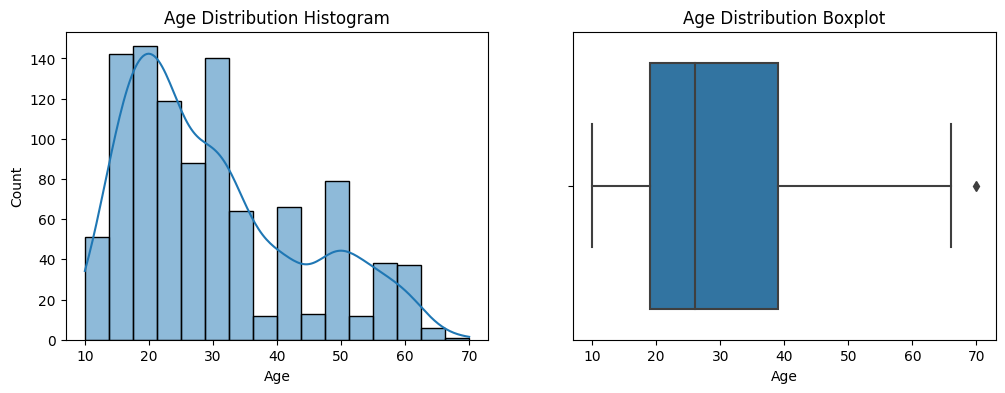

In [7]:
#Checking for outliers
def num_plot(data,col):
   fig, ax = plt.subplots(1, 2,figsize=(12,4))
   sns.histplot(data=data, x=col, kde=True, ax=ax[0]) 
   sns.boxplot(data=data, x=col, ax=ax[1]) 
   ax[0].set_title(f"{col} Distribution Histogram") 
   ax[1].set_title(f"{col} Distribution Boxplot") 
   plt.show()
num_plot(data,'Age')

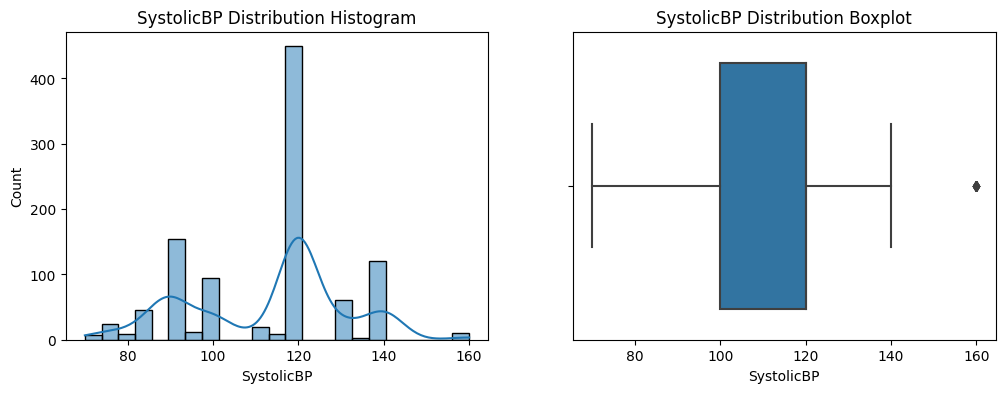

In [8]:
num_plot(data,'SystolicBP')

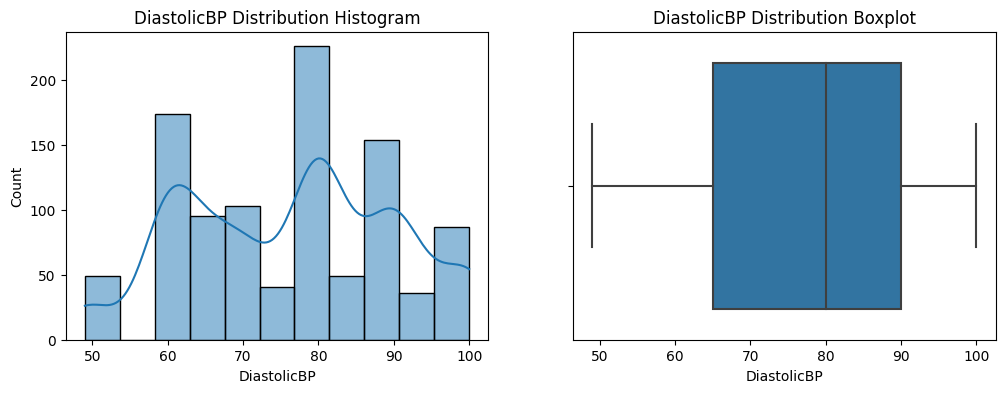

In [9]:
num_plot(data,'DiastolicBP')

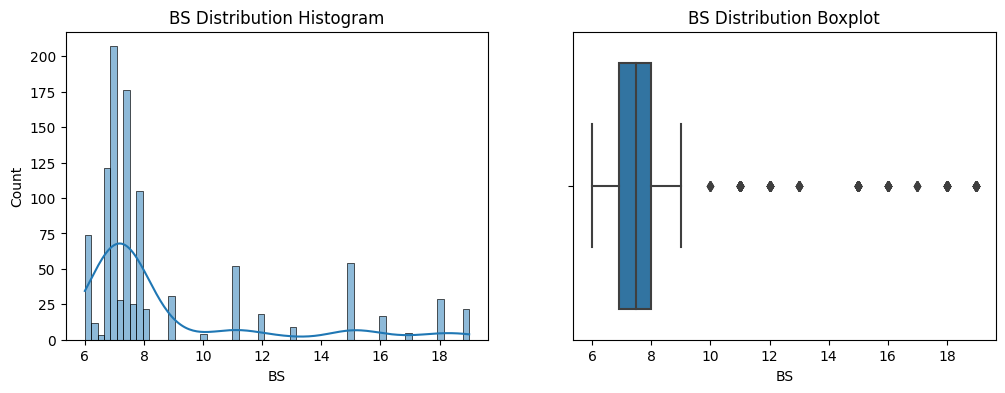

In [10]:
num_plot(data,'BS')

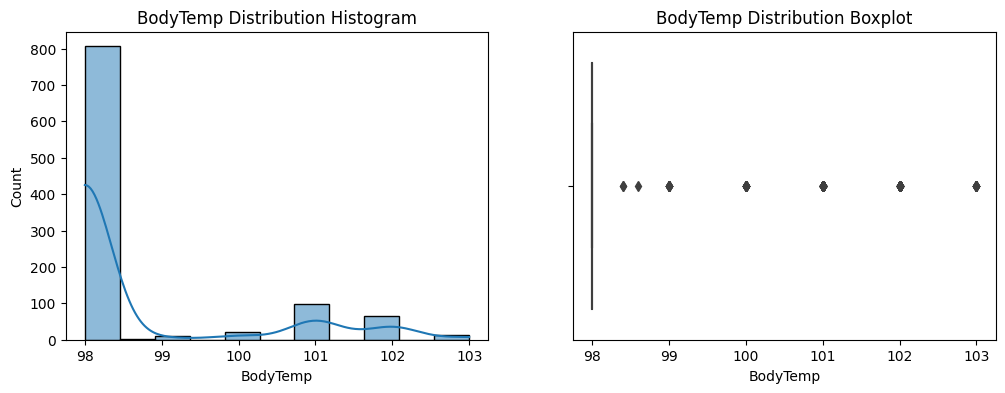

In [11]:
num_plot(data,'BodyTemp')

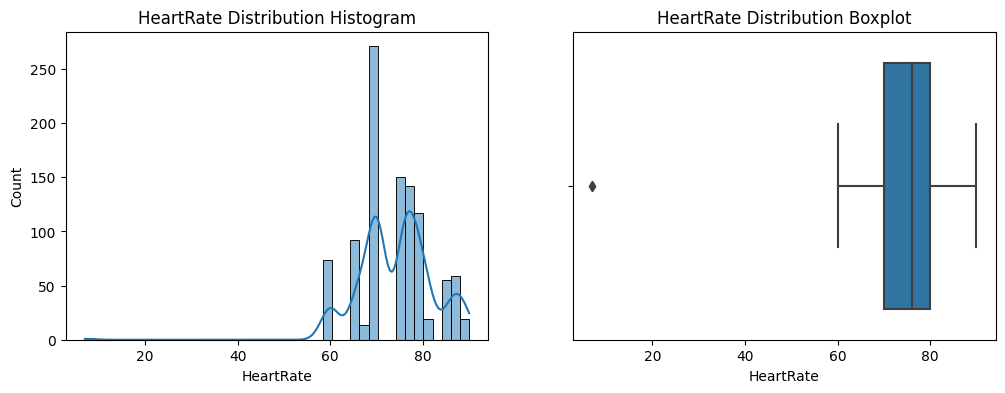

In [12]:
num_plot(data,'HeartRate')

In [13]:
#Handling outliers
data=data.drop(data.index [data.HeartRate == 7])

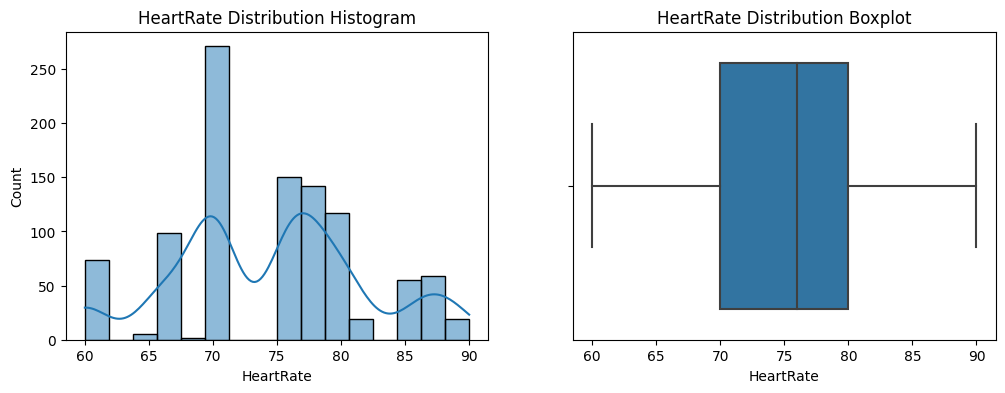

In [14]:
num_plot(data,'HeartRate')

In [45]:
X=data.drop("RiskLevel", axis=1) 
y= data.RiskLevel 
X_train, X_test, y_train, y_test=split(X, y, test_size=0.2, random_state=1)

In [16]:
#Decision tree model
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_train_pred=dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
train_acc = accuracy_score(y_train,dt_train_pred)
test_acc=accuracy_score(y_test,dt_test_pred)
print("Training Accuracy:{}".format(train_acc))
print("Testing Accuracy:{}".format(test_acc))

Training Accuracy:0.9208899876390606
Testing Accuracy:0.8719211822660099


In [17]:
#knn Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_train_pred=knn.predict(X_train)
knn_test_pred=knn.predict(X_test)
train_acc = accuracy_score(y_train,knn_train_pred)
test_acc=accuracy_score(y_test,knn_test_pred)
print("Training Accuracy :{}".format(train_acc))
print("Testing Accuracy:{}".format(test_acc))

Training Accuracy :0.788627935723115
Testing Accuracy:0.7536945812807881


In [18]:
#Support Vector Machine model
Svm= SVC()
Svm.fit(X_train,y_train)
Svm_train_pred= Svm.predict(X_train)
Svm_test_pred=Svm.predict(X_test)
train_acc = accuracy_score(y_train,Svm_train_pred)
test_acc=accuracy_score(y_test,Svm_test_pred)
print("Training Accuracy:{}".format(train_acc))
print("Testing Accuracy:{}".format(test_acc))

Training Accuracy:0.5896168108776267
Testing Accuracy:0.6009852216748769


In [19]:
#Random Forest model
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_pred= rf.predict(X_train)
rf_test_pred=rf.predict(X_test)
train_acc= accuracy_score(y_train,rf_train_pred)
test_acc=accuracy_score(y_test,rf_test_pred)
print("Training Accuracy:{} ".format(train_acc))
print("Testing Accuracy:{}".format(test_acc))

Training Accuracy:0.9208899876390606 
Testing Accuracy:0.8817733990147784


In [20]:
#Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_pred= lr.predict(X_train)
lr_test_pred= lr.predict(X_test)
train_acc = accuracy_score(y_train,lr_train_pred)
test_acc=accuracy_score(y_test,lr_test_pred)
print("Training Accuracy:{}".format(train_acc))
print("Testing Accuracy:{}".format(test_acc))

Training Accuracy:0.6069221260815822
Testing Accuracy:0.5862068965517241


In [21]:
# Bagging Classifier model
bc =BaggingClassifier() 
bc.fit(X_train,y_train) 
bc_train_pred=bc.predict(X_train) 
bc_test_pred=bc.predict(X_test) 
train_acc=accuracy_score (y_train,bc_train_pred) 
test_acc=accuracy_score (y_test,bc_test_pred) 
print("Testing accuracy: {}". format(test_acc)) 
print("Training accuracy: {}". format(train_acc))

Testing accuracy: 0.8620689655172413
Training accuracy: 0.9171817058096415


In [22]:
#Adaboost Classifier model
abc=AdaBoostClassifier() 
abc.fit(X_train,y_train) 
abc_train_pred=abc.predict(X_train) 
abc_test_pred=abc.predict(X_test) 
train_acc=accuracy_score (y_train, abc_train_pred) 
test_acc=accuracy_score (y_test, abc_test_pred) 
print("Training accuracy: {}". format (train_acc)) 
print("Testing accuracy: {}". format(test_acc))

Training accuracy: 0.6761433868974042
Testing accuracy: 0.6798029556650246


In [23]:
#Naive Bayes model
gnb = GaussianNB() 
gnb.fit(X_train,y_train) 
gnb_train_pred=gnb.predict(X_train) 
gnb_test_pred=gnb.predict(X_test) 
train_acc=accuracy_score (y_train, gnb_train_pred) 
print("Testing accuracy: {}". format (test_acc)) 
test_acc=accuracy_score(y_test,gnb_test_pred) 
print("Training accuracy: {}".format(train_acc))

Testing accuracy: 0.6798029556650246
Training accuracy: 0.5970333745364648


In [24]:
#Decision tree
print(classification_report (y_test,dt_test_pred)) 
confusion_matrix(y_test, dt_test_pred)

              precision    recall  f1-score   support

   high risk       0.91      0.92      0.91        64
    low risk       0.88      0.84      0.86        79
    mid risk       0.83      0.87      0.85        60

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



array([[59,  3,  2],
       [ 4, 66,  9],
       [ 2,  6, 52]])

In [25]:
#knn 
print(classification_report (y_test,knn_test_pred)) 
confusion_matrix(y_test, knn_test_pred)

              precision    recall  f1-score   support

   high risk       0.88      0.83      0.85        64
    low risk       0.72      0.80      0.76        79
    mid risk       0.66      0.62      0.64        60

    accuracy                           0.75       203
   macro avg       0.76      0.75      0.75       203
weighted avg       0.76      0.75      0.75       203



array([[53,  5,  6],
       [ 3, 63, 13],
       [ 4, 19, 37]])

In [26]:
#SVM
print(classification_report (y_test,Svm_test_pred)) 
confusion_matrix(y_test, Svm_test_pred)

              precision    recall  f1-score   support

   high risk       0.89      0.52      0.65        64
    low risk       0.56      0.86      0.68        79
    mid risk       0.47      0.35      0.40        60

    accuracy                           0.60       203
   macro avg       0.64      0.58      0.58       203
weighted avg       0.64      0.60      0.59       203



array([[33, 18, 13],
       [ 0, 68, 11],
       [ 4, 35, 21]])

In [27]:
#Random forest
print(classification_report (y_test,rf_test_pred)) 
confusion_matrix(y_test, rf_test_pred)

              precision    recall  f1-score   support

   high risk       0.95      0.94      0.94        64
    low risk       0.88      0.87      0.88        79
    mid risk       0.81      0.83      0.82        60

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203



array([[60,  1,  3],
       [ 1, 69,  9],
       [ 2,  8, 50]])

In [28]:
#logistic regression
print(classification_report (y_test,lr_test_pred)) 
confusion_matrix(y_test, lr_test_pred)

              precision    recall  f1-score   support

   high risk       0.84      0.59      0.70        64
    low risk       0.59      0.72      0.65        79
    mid risk       0.39      0.40      0.39        60

    accuracy                           0.59       203
   macro avg       0.61      0.57      0.58       203
weighted avg       0.61      0.59      0.59       203



array([[38,  9, 17],
       [ 1, 57, 21],
       [ 6, 30, 24]])

In [29]:
#Boosting classifier
print(classification_report (y_test,bc_test_pred)) 
confusion_matrix(y_test, bc_test_pred)

              precision    recall  f1-score   support

   high risk       0.91      0.94      0.92        64
    low risk       0.85      0.84      0.84        79
    mid risk       0.83      0.82      0.82        60

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



array([[60,  3,  1],
       [ 4, 66,  9],
       [ 2,  9, 49]])

In [30]:
#AdaBoost classifier
print(classification_report (y_test,abc_test_pred)) 
confusion_matrix(y_test, abc_test_pred)

              precision    recall  f1-score   support

   high risk       0.84      0.73      0.78        64
    low risk       0.76      0.65      0.70        79
    mid risk       0.50      0.67      0.57        60

    accuracy                           0.68       203
   macro avg       0.70      0.68      0.68       203
weighted avg       0.71      0.68      0.69       203



array([[47,  4, 13],
       [ 1, 51, 27],
       [ 8, 12, 40]])

In [31]:
#Naive bayes
print(classification_report (y_test,gnb_test_pred)) 
confusion_matrix(y_test, gnb_test_pred)

              precision    recall  f1-score   support

   high risk       0.85      0.62      0.72        64
    low risk       0.56      0.94      0.70        79
    mid risk       0.35      0.13      0.19        60

    accuracy                           0.60       203
   macro avg       0.59      0.57      0.54       203
weighted avg       0.59      0.60      0.56       203



array([[40, 13, 11],
       [ 1, 74,  4],
       [ 6, 46,  8]])

In [32]:
#create param 
model_param= { 
'DecisionTreeClassifier':{ 
'model' :DecisionTreeClassifier(), 
'param':{ 
'criterion': ['gini', 'entropy'], 
'max_depth' : [4,5,6,7,8,28,58] 
}
},
 'KNeighborsClassifier':{ 
'model' :KNeighborsClassifier(), 
'param':{ 
'n_neighbors': [5,10,15,20,25]
 }
},
'SVC':{
'model' :SVC(), 
'param':{ 
'kernel': ['rbf', 'linear", "sigmoid'], 
'C': [0.1, 1, 10, 100] 
}
},
'RandomForestclassifier':{ 
'model': RandomForestClassifier(), 
'param':{ 
'n_estimators': [10,20,50, 100, 200, 500], 
'max_features': ['auto', 'sqrt', 'log2'], 
'max_depth': [4,5,6,7,8,20,30,50], 
'criterion' :['gini', 'entropy']
 }
},
'Logistic Regression':{ 
'model': LogisticRegression(), 
'param':{ 
'C':np.logspace(-3,3,7), 
'penalty':["l1","l2"] 
} 
},
'BaggingClassifier':{ 
'model': BaggingClassifier(), 
'param':{ 
'n_estimators': [18,30,50,100,150,200], 
'random_state': [1,3,5,7,9,15,50,100] 
} 
},
'AdaBoostClassifier': { 
'model': AdaBoostClassifier(), 
'param':{ 
'n_estimators': [18,30,50, 100, 150, 200], 
'random_state': [1,3,5,7,9,15,50,100] 
}
}
}

In [33]:
scores =[] 
for model_name, mp in model_param.items(): 
   model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5, return_train_score=False) 
   model_selection.fit(X_train,y_train) 
   scores.append({
      'model':model_name,
      'best_score': model_selection.best_score_, 
      'best_params': model_selection.best_params_
   })

In [34]:
pd.set_option("display.max_colwidth", -1)
of_model_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']) 
of_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.814592,"{'criterion': 'gini', 'max_depth': 28}"
1,KNeighborsClassifier,0.668729,{'n_neighbors': 5}
2,SVC,0.676213,"{'C': 100, 'kernel': 'rbf'}"
3,RandomForestclassifier,0.828211,"{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 20}"
4,Logistic Regression,0.604501,"{'C': 0.001, 'penalty': 'l2'}"
5,BaggingClassifier,0.820781,"{'n_estimators': 150, 'random_state': 50}"
6,AdaBoostClassifier,0.637789,"{'n_estimators': 200, 'random_state': 1}"


# ***Save The Best Model***

In [35]:
model_randomforest=RandomForestClassifier( criterion='gini',max_depth=50,max_features="auto",n_estimators=20) 

model_randomforest.fit(X_train, y_train) 

RandomForestClassifier(max_depth=50, max_features='auto', n_estimators=20)

In [36]:
result=model_randomforest.score(X_train,y_train)*100 
result

92.08899876390606

In [37]:
result=model_randomforest.score(X_test,y_test)*100 
result

87.68472906403942

In [38]:
model_randomforest.predict(X_test)

array(['low risk', 'mid risk', 'low risk', 'high risk', 'mid risk',
       'high risk', 'mid risk', 'low risk', 'high risk', 'low risk',
       'low risk', 'mid risk', 'high risk', 'mid risk', 'high risk',
       'high risk', 'high risk', 'mid risk', 'mid risk', 'low risk',
       'high risk', 'mid risk', 'low risk', 'low risk', 'high risk',
       'high risk', 'high risk', 'high risk', 'mid risk', 'mid risk',
       'low risk', 'mid risk', 'mid risk', 'low risk', 'high risk',
       'low risk', 'mid risk', 'mid risk', 'high risk', 'mid risk',
       'low risk', 'low risk', 'mid risk', 'mid risk', 'mid risk',
       'mid risk', 'mid risk', 'low risk', 'low risk', 'mid risk',
       'high risk', 'low risk', 'low risk', 'mid risk', 'low risk',
       'mid risk', 'low risk', 'high risk', 'low risk', 'low risk',
       'low risk', 'low risk', 'low risk', 'mid risk', 'high risk',
       'high risk', 'low risk', 'low risk', 'low risk', 'high risk',
       'low risk', 'mid risk', 'low risk', 

In [39]:
import pickle
pickle.dump(model_randomforest,open("model_randomforest.pkl",'wb'))

In [41]:
model=pickle.load(open("model_randomforest.pkl","rb"))
app=Flask(__name__)